In [1]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm_notebook as tqdm
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

#绘图设置
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[1])
sns.set_style(styles[2])
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.

Populating the interactive namespace from numpy and matplotlib


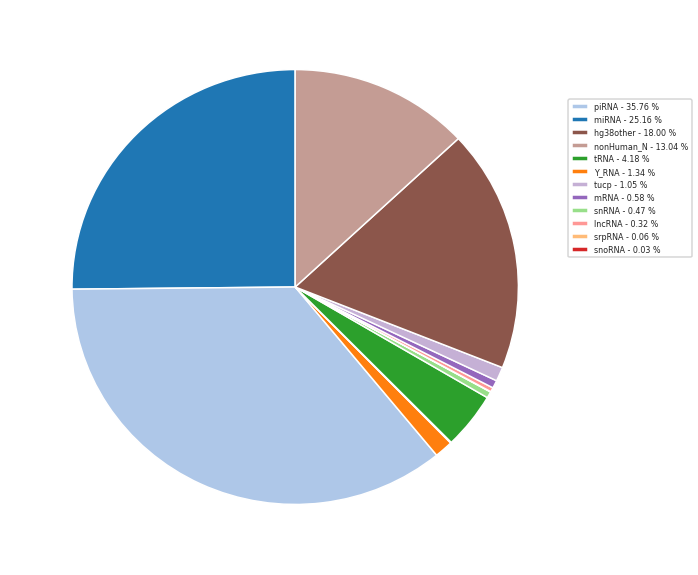

In [2]:
rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'srpRNA','tRNA','snRNA',
            'snoRNA','lncRNA','mRNA','tucp','hg38other','nonHuman_N'
            ]
rna_ratio = pd.read_table('/home/student3/llq/plot_making/pie_plot/merged_pieplot_making.csv',sep = ' ')
x = rnanames
colours = tableau20[:len(x)]/1.
y = rna_ratio.mean(axis=1)
y_sum = sum(y)
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100/y_sum

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts = ax1.pie(y,  colors=colours, #autopct='%1.1f%%',
                        shadow=False, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)